<a href="https://colab.research.google.com/github/jrplatin/python-cv/blob/master/python_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from PIL import Image

def _average_pixel_vals(i,j,pixel_arr, num):
  sum_r = 0
  sum_g = 0
  sum_b = 0 

  half_num = num // 2
  num = num ** 2

  for row in range(i-half_num,i+1+half_num):
    for col in range(j-half_num,j+1+half_num):
      for channel in range(3):
        if channel == 0:
          sum_r += pixel_arr[row,col][0]
        elif channel == 1:
          sum_g += pixel_arr[row,col][1]
        elif channel == 2:
          sum_b += pixel_arr[row,col][2]
  return sum_r//num, sum_g//num, sum_b//num



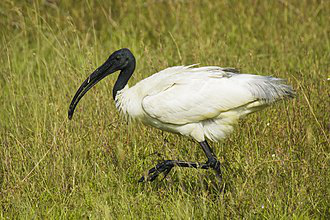

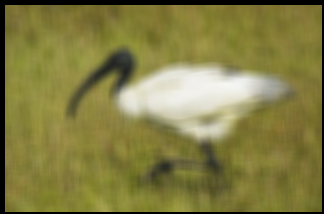

In [85]:
def blur(old_image_name, filter_size):
  old_image = Image.open(old_image_name)
  old_pixel_arr = old_image.load()

  img = Image.new(im.mode, (im.size[0]- 1 -filter_size//2, im.size[1]-1-filter_size//2))
  newPixelArr = img.load()

  for i in range(filter_size//2, img.size[0]-2):
      for j in range(filter_size//2, img.size[1]-2):
          newPixelArr[i,j] = _average_pixel_vals(i,j,old_pixel_arr, filter_size)
  display(old_image)
  display(img)


blur('ibis.jpg', 11)

In [114]:
def _apply_sobel(i,j,pixel_arr):
  val = 0
  sobel = [[-1,-2,-1],[0,0,0],[1,2,1]]
  for row in range(i-1,i+2):
    for col in range(j-1,j+2):
      val += pixel_arr[row,col] * sobel[row-i][col-j]
  return val

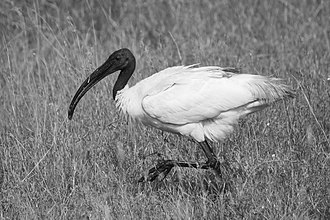

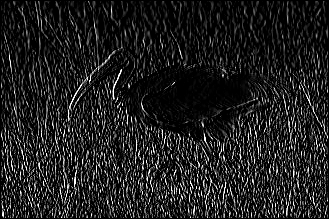

In [115]:
def detect_edges(image_name):
  old_image = Image.open(image_name).convert('L')
  old_pixel_arr = old_image.load()

  img = Image.new('L', (im.size[0]-1, im.size[1]-1))
  newPixelArr = img.load()

  for i in range(1, img.size[0]-1):
      for j in range(1, img.size[1]-1):
          newPixelArr[i,j] = _apply_sobel(i,j,old_pixel_arr)

  display(old_image)
  display(img)

detect_edges('ibis.jpg')